
###**Case Study:** Stroke Prediction

**Objective:** The goal of this challenge is to apply the deep learning  model to predict if a person will have a stroke or not.


**Dataset Explanation:** We will be using the stroke dataset. Its features are:


* **id:** unique identifier
* **gender:** "Male", "Female" or "Other"
* **age:** age of the patient
* **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married:** "No" or "Yes"
* **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type:** "Rural" or "Urban"
* **avg_glucose_level:** average glucose level in blood
* **bmi:** body mass index
* **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* **stroke:** 1 if the patient had a stroke or 0 if not

#Importing Libraries

We start by importing the libraries: numpy and pandas

In [ ]:
#Test Your Zaka
import numpy as np
import pandas as pd

#Loading the Dataset

We load the dataset from a csv file, and see its first rows

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# dataset link: https://drive.google.com/file/d/1Wpm7jOL2nLlf18MWaZLUN4is5cKgVKyL/view?usp=sharing
data=pd.read_csv('/content/drive/MyDrive/ZAka/Week 6/healthcare-dataset-stroke-data.csv') # change to your saved dataset directory
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Exploratory Data Analysis

Now we start the exploratory data analysis.

###Shape of the data

First, you need to know the shape of our data (How many examples and features do we have)

In [ ]:
#Test Your Zaka
print(f"We have {data.shape[0]} examples, {(data.shape[1])-1} features and 1 output")

We have 5110 examples, 11 features and 1 output


###Types of different Columns

See the type of each of your features and see if you have any nulls

In [ ]:
#Test Your Zaka
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###Dealing with categorical variables

Now we will walk through the categorical variables that we have to see the categories and the counts of each of them.

'smoking_status'

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


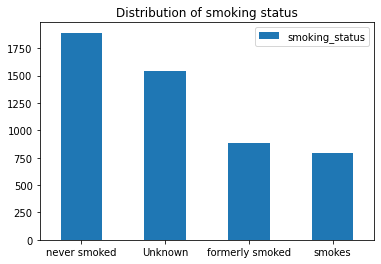

In [ ]:
#Test Your Zaka
import matplotlib.pyplot as plt

print(data.smoking_status.value_counts())
data.smoking_status.value_counts().plot.bar(rot=0)
plt.title("Distribution of smoking status")
plt.legend()


'Residence_type'

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


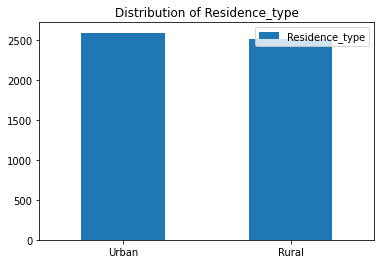

In [ ]:
#Test Your Zaka

print(data.Residence_type.value_counts())
data.Residence_type.value_counts().plot.bar(rot=0)
plt.title("Distribution of Residence_type")
plt.legend()

'work_type'

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


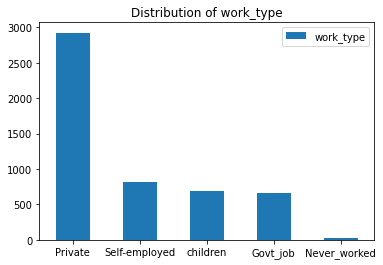

In [ ]:
#Test Your Zaka
print(data.work_type.value_counts())
data.work_type.value_counts().plot.bar(rot=0)
plt.title("Distribution of work_type")
plt.legend()

'ever_married'

Yes    3353
No     1757
Name: ever_married, dtype: int64


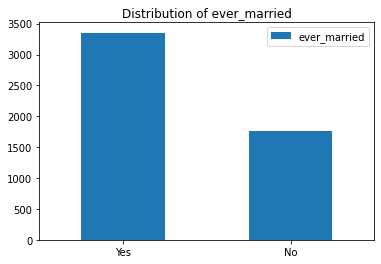

In [ ]:
#Test Your Zaka
print(data.ever_married.value_counts())
data.ever_married.value_counts().plot.bar(rot=0)
plt.title("Distribution of ever_married")
plt.legend()

'hypertension'

0    4612
1     498
Name: hypertension, dtype: int64


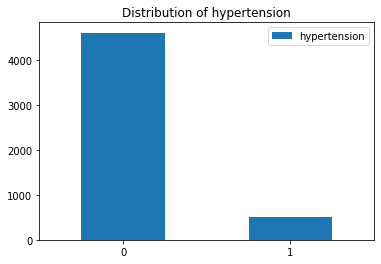

In [ ]:
#Test Your Zaka
print(data.hypertension.value_counts())
data.hypertension.value_counts().plot.bar(rot=0)
plt.title("Distribution of hypertension")
plt.legend()

'heart_disease'

0    4834
1     276
Name: heart_disease, dtype: int64


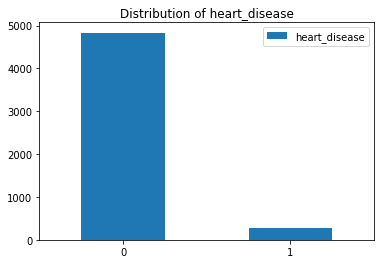

In [ ]:
#Test Your Zaka
print(data.heart_disease.value_counts())
data.heart_disease.value_counts().plot.bar(rot=0)
plt.title("Distribution of heart_disease")
plt.legend()

'stroke'

0    4861
1     249
Name: stroke, dtype: int64


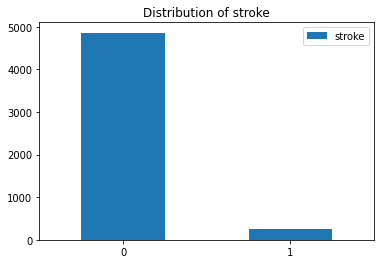

In [ ]:
#Test Your Zaka
print(data.stroke.value_counts())
data.stroke.value_counts().plot.bar(rot=0 )
plt.title("Distribution of stroke")
plt.legend()

#Preprocessing

###Dealing with Nulls

####Encoding Categorical Features

Here you will encode those categorical variables to be able to use them to train our DL model.

In [ ]:
#Test Your Zaka
print(data.isnull().sum()) 
print("There is no null values for the categorical features")
print("Ready for encoding")

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
There is no null values for the categorical features
Ready for encoding


In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
cat_data=data[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type', 'smoking_status']]
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

cat_data=cat_data.astype('float')  

print("Test to see if the features were correctly hot-encoded")
print("\nThe value counts of the categories for the original work type features")
print(data.work_type.value_counts())

print("\nTransformed to")
print(cat_data.work_type.value_counts())

Test to see if the features were correctly hot-encoded

The value counts of the categories for the original work type features
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Transformed to
2.0    2925
3.0     819
4.0     687
0.0     657
1.0      22
Name: work_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Fill the nulls with the mean value, and make sure you have no nulls anymore

In [ ]:
#Test Your Zaka
num_data=data[['id', 'age','avg_glucose_level','bmi']]

num_data['bmi'].fillna(num_data['bmi'].mean(), inplace=True)
print(num_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   age                5110 non-null   float64
 2   avg_glucose_level  5110 non-null   float64
 3   bmi                5110 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 159.8 KB
None


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


###Normalizing Features

Now you normalize the input data by dividing with the max value of each column.

In [ ]:
#Test Your Zaka
norm_data = pd.concat([cat_data, num_data,data.iloc[:,-1]], axis=1)
norm_data=norm_data.divide(norm_data.max())
norm_data.head() # gender has 0,0.5,1 since there were 3 classes (male, female, other)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,id,age,avg_glucose_level,bmi,stroke
0,0.5,0.0,1.0,1.0,0.50,1.0,0.333333,0.124020,0.817073,0.841577,0.375000,1.0
1,0.0,0.0,0.0,1.0,0.75,0.0,0.666667,0.708473,0.743902,0.744130,0.296037,1.0
2,0.5,0.0,1.0,1.0,0.50,0.0,0.666667,0.426542,0.975610,0.389784,0.332992,1.0
3,0.0,0.0,0.0,1.0,0.50,1.0,1.000000,0.825089,0.597561,0.630124,0.352459,1.0
4,0.0,1.0,0.0,1.0,0.75,0.0,0.666667,0.022827,0.963415,0.640760,0.245902,1.0


###Removing Unnecessary Features

From the features that we have, remove one that is irrelevant for our predictions

In [ ]:
#Test Your Zaka
norm_data=norm_data.drop(['id'], axis=1)
norm_data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age,avg_glucose_level,bmi,stroke
0,0.5,0.0,1.0,1.0,0.50,1.0,0.333333,0.817073,0.841577,0.375000,1.0
1,0.0,0.0,0.0,1.0,0.75,0.0,0.666667,0.743902,0.744130,0.296037,1.0
2,0.5,0.0,1.0,1.0,0.50,0.0,0.666667,0.975610,0.389784,0.332992,1.0
3,0.0,0.0,0.0,1.0,0.50,1.0,1.000000,0.597561,0.630124,0.352459,1.0
4,0.0,1.0,0.0,1.0,0.75,0.0,0.666667,0.963415,0.640760,0.245902,1.0


#Building the DL Model

Now it's time to build the actual model, and observe a summary of it.<br>
The sizes of the **hidden** layers that you should use are: [32,16,8,4,2].
The activation for each of those hidden layers is 'relu'
<br>
Print the summary of your model.

In [ ]:
#Test Your Zaka
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():

  model=Sequential()
  model.add(Dense(32, input_dim=10, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(4, activation='relu'))
  model.add(Dense(2, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  print(model.summary())

  return model

model=create_model()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                352       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 4)                 36        
                                                                 
 dense_10 (Dense)            (None, 2)                 10        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 1,065
Trainable params: 1,065
Non-traina

###Compiling the model

Now we compile the model. Here we want to measure the accuracy as well as the precision and recall to know better about the performance of our model.
We will use 'adam' as optimizer.

In [ ]:
#Test Your Zaka

from keras import backend as K

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():

  model=Sequential()
  model.add(Dense(32, input_dim=10, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(4, activation='relu'))
  model.add(Dense(2, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  print(model.summary())
  model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy', precision, recall])

  return model

model1=create_model()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                352       
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 4)                 36        
                                                                 
 dense_16 (Dense)            (None, 2)                 10        
                                                                 
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 1,065
Trainable params: 1,065
Non-traina

###Fitting the data

we split our dataset between training and testing, and we fit the model on training data (70%), and validate on the testing data (30%). The training happens for 15 epochs.

In [ ]:
#Test Your Zaka
from sklearn.model_selection import train_test_split 

x=norm_data.iloc[:,:-1].values 
y=norm_data.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

print(f" We have {x_train.shape} example for trainning and {x_test.shape} example for testing")

model1.fit(x_train, y_train, epochs=15)

 We have (3577, 10) example for trainning and (1533, 10) example for testing
Epoch 1/15
112/112 [==============================] - 1s 2ms/step - loss: 0.6689 - accuracy: 0.9508 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/15
112/112 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.9508 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/15
112/112 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.9508 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/15
112/112 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.9508 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/15
112/112 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.9508 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/15
112/112 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.9508 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/15
112/112 [==============================] -

In [ ]:
scores=model1.evaluate(x_test, y_test)

print("\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model1.metrics_names[2], scores[2]*100))
print("\n%s: %.2f%%" % (model1.metrics_names[3], scores[3]*100))

48/48 [==============================] - 0s 1ms/step - loss: 0.2976 - accuracy: 0.9524 - precision: 0.0000e+00 - recall: 0.0000e+00

accuracy: 95.24%

precision: 0.00%

recall: 0.00%


What can you deduce from the results you obtained?

**our model wasn't able to predict positive cases. (Since precision and recall were 0 then it just learnt for negative)**



#Improving DL Models

###Checking For Data Imbalance

Plot a histogram that shows the distribution of 'stroke' column

Number who had stroke= 249
Number who had not stroke= 4861


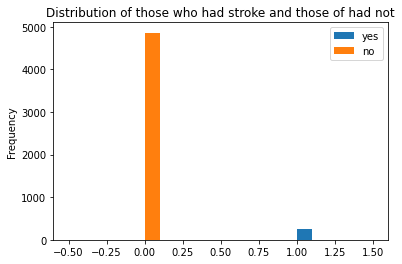

In [ ]:
#Test Your Zaka

had_stroke=norm_data[(norm_data['stroke']==1)]
no_stroke=norm_data[(norm_data['stroke']==0)]

print(f"Number who had stroke= {had_stroke.shape[0]}")
print(f"Number who had not stroke= {no_stroke.shape[0]}")

plt.hist(had_stroke['stroke'], label='yes')
plt.hist(no_stroke['stroke'], label='no')

plt.title("Distribution of those who had stroke and those of had not")
plt.ylabel("Frequency")
plt.legend()
plt.show()


We have a huge imbalance in the data, this is why we fix it with oversamppling and undersampling.

This time, you will learn to oversample using the SMOTE() function instead of random oversampling, and this is because SMOTE will generate new data based on the data that we have, so we avoid overfitting.

After doing that, plot the new histogram showing the proportions of people having stroke or not

No handles with labels found to put in legend.


The new balanced dataset is now composed of Counter({1.0: 4861, 0.0: 4861})


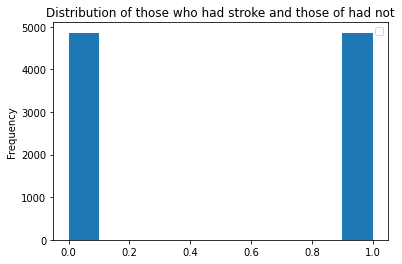

In [ ]:
#Test Your Zaka
# SMOTE: Synthetic Minority Oversampling Technique
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter


# transform the dataset
oversample = SMOTE()
x_bal, y_bal = oversample.fit_resample(x, y)

counter = Counter(y_bal)
print(f"The new balanced dataset is now composed of {counter}")

plt.hist(y_bal)
plt.title("Distribution of those who had stroke and those of had not")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Now we will fit our same model on the new balanced data that we have, with the same conditions we had before (train/test splits, epochs, etc)

In [ ]:
#Test Your Zaka

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_bal,y_bal, test_size=0.3)

print(f" We have {x_train2.shape} example for training and {x_test2.shape} example for testing")

model2=create_model()
model2.fit(x_train2, y_train2, epochs=15)

scores2=model2.evaluate(x_test2, y_test2)

print("\n%s: %.2f%%" % (model2.metrics_names[1], scores2[1]*100))
print("\n%s: %.2f%%" % (model2.metrics_names[2], scores2[2]*100))
print("\n%s: %.2f%%" % (model2.metrics_names[3], scores2[3]*100))

 We have (6805, 10) example for training and (2917, 10) example for testing
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                352       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dense_21 (Dense)            (None, 4)                 36        
                                                                 
 dense_22 (Dense)            (None, 2)                 10        
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                            

Comment the performance you obtained

**The accuracy decreased since in the previous one it just learnt on the negative cases(since they were the majority) and tested on negative cases in the majority of instances. However, now it was trained in both negative and positive cases. The precision and recall were boosted in this model since now it was trained enough on positive cases so it was able to correclty predict on new cases.**

###Model Design

Now you will introduce batch normalization after each layer of your network

In [ ]:
#Test Your Zaka
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

def create_model2():
  model=Sequential()
  model.add(Dense(32, input_dim=10, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(16, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(8, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(4, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(2, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(1, activation='sigmoid'))

  print(model.summary())
  model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy', precision, recall])

  return model

Let's train the model with the same conditions as before

In [ ]:
#Test Your Zaka

model3=create_model2()
model3.fit(x_train2, y_train2, epochs=15)

scores2=model3.evaluate(x_test2, y_test2)

print("\n%s: %.2f%%" % (model3.metrics_names[1], scores2[1]*100))
print("\n%s: %.2f%%" % (model3.metrics_names[2], scores2[2]*100))
print("\n%s: %.2f%%" % (model3.metrics_names[3], scores2[3]*100))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                352       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_2 (Batc  (None, 8)               

Comment the performance of your model

**All the metrics scores increased when we perfomed batch normalization**

###Hyperparameter Tuning

Now we will tune some hyperparameters of our model.

We start by wrapping our model inside a kerasClassifier to be able to use it in Scikit Learn

In [ ]:
#Test Your Zaka
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model4 = KerasClassifier(build_fn=create_model2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


We will tune the batch size (it can be 50 or 100) and the number of epochs (it can be 50 or 100).
We will use a 3 folds cross validation

In [ ]:
#Test Your Zaka
from sklearn.model_selection import GridSearchCV

param_grid = {
    'batch_size': [50,100],
    'epochs': [50, 100],
}

DL_search = GridSearchCV(model4, param_grid=param_grid, verbose = 3, cv=3)

# fitting the model for grid search 
DL_search.fit(x_train2 , y_train2)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                352       
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_6 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_32 (Dense)            (None, 8)                 136       
                                                            

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2fd7e37310>,
             param_grid={'batch_size': [50, 100], 'epochs': [50, 100]},
             verbose=3)

Find the best parameters according to the Grid Search you have done, and the accuracy for the best model.

In [ ]:
#Test Your Zaka
# summarize

print('Best Accuracy score: %.3f' % DL_search.best_score_)
print('Config: %s' % DL_search.best_params_)

Best Accuracy score: 0.874
Config: {'batch_size': 50, 'epochs': 100}


Fit the model on the best hyperparameters we obtained.

In [ ]:
#Test Your Zaka
model4.fit(x_train2 , y_train2, batch_size=50, epochs=100)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 32)                352       
                                                                 
 batch_normalization_70 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_109 (Dense)           (None, 16)                528       
                                                                 
 batch_normalization_71 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_110 (Dense)           (None, 8)                 136       
                                                                 
 batch_normalization_72 (Bat  (None, 8)              

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

pred_4=model4.predict(x_test2)

accuracy_model4 = accuracy_score(y_test2, pred_4)
precision_model4 = precision_score(y_test2, pred_4)
recall_model4 = recall_score(y_test2, pred_4)

print("Accuracy:", accuracy_model4,
      "\nPrecision:",precision_model4,
      "\nRecall:", recall_model4)


Accuracy: 0.8909838875557079 
Precision: 0.8411728772144166 
Recall: 0.9595818815331011




*  model1_performance:Accuracy: 95.24%-Precision: 0%- Recall: 0% 
*  model2_performance:Accuracy: 81.49%-Precision: 78.09%- Recall: 87.59%
*  model3_performance:Accuracy: 84.50%-Precision: 80.74%- Recall: 90.94%
*  model4_performance:Accuracy: 89.09%-Precision: 84.11%-Recall:95.9

**Last model has the best performance as it showed highest scores in case of precision and recall**